In [1]:
import sys; sys.path.append("../resources/")
from dotplot_utils import *
import matplotlib
import pandas as pd
import seaborn as sns
# make this notebook work better with Scanpy
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# make output directories
import os
if not os.path.exists("scRNA_out"):
    os.mkdir("scRNA_out")

if not os.path.exists("scRNA_out/plots_overview/"):
    os.mkdir("scRNA_out/plots_overview/")

In [3]:
sc.set_figure_params(transparent=True, dpi_save=400)
sns.set_style("white")
sc.settings.figdir = "scRNA_out/plots_overview/"

---
## Read in key dataframe with sample information

In [4]:
sample_key = pd.read_csv("../resources/ST/visium_sample_key.csv", index_col=0)

---
## Define gene signatures

In [5]:
# recombine signatures into useful categories
signatures_epi_stroma = [
    'IFN stimulated EPI',
    'iCMS2',
    'iCMS3',
    'Basal',
    'Squamous',
    'Mesenchymal',
    'Glandular',
    'Ciliated',
    'Alveolar',
    'AC', # astrocyte
    'OPC', # oligodendrocyte progenitor
    'NPC', # neural progenitor
    'IES', # custom epithelial-intrinsic exclusion signature
]

signatures_myeloid = [
    'Myeloid',
    'cDC2',
    'cDC1',
    'Macrophage',
    'Classical monocytes',
    'M1',
    'M2',
    'Neutrophils',
    'Costimulatory MYE',
    'Stimulatory DCs',
    'IFN stimulated MYE',
]

signatures_lymphoid = [
    'T cell',
    'T reg',
    'T cell CD4',
    'T cell CD8',
    'T reg resting',
    'T reg suppressive',
    'T reg tissue homing',
    'T reg cytokines',
    'T reg activation',
    'TH1',
    'TH2',
    'TH17',
    'T cell exhaustion',
    'TRM', # tissue-resident memory T cells
    'NK cell',
    'B cell',
    'Plasma cell',
]

signatures_activity = [
    'EMT',
    'pEMT',
    'Senescence',
    'SASP',
    'Interferon',
    'Hypoxia',
    'Oxphos',
    'Stress',
    'Stress response',
    'Bacterial response',
    'Fibrosis',
    'Cytotoxicity',
    'Exhaustion',
    'Cytokines',
    'Chemokines',
    'MHC',
    'Fetal',
    'Stem',
    'Metaplasia',
    'Proliferation',
    'Translation',
    'Cycle',
    'Metal',
    'CytoTRACE',
    'CNV score',
    'TMB',
]

signatures_curated = [
    # activity
    'pEMT',
    'Metaplasia',
    'Stem',
    'CytoTRACE',
    'IES',
    'CNV score',
    'MHC',
    'Fibrosis',
    'Bacterial response',
    # epi/stroma
    'IFN stimulated EPI',
    'iCMS2',
    'iCMS3',
    'Squamous',
    # lymphoid
    'T reg suppressive',
    'T cell CD4',
    'T cell CD8',
    'T cell exhaustion',
    # myeloid
    'IFN stimulated MYE',
    'Neutrophils',
]

signatures_fig_1 = [
    "Stem",
    "T cell CD4",
    "iCMS2",
    "iCMS3",
    "Metaplasia",
    "CytoTRACE",
    "CNV score",
    "T cell CD8"
]

signatures_fig_2 = [
    "Stem",
    "T cell CD4",
    "iCMS2",
    "iCMS3",
    "Metaplasia",
    "CytoTRACE",
    "CNV score",
    "TMB",
    "T cell CD8",
    "IFN stimulated MYE",
    "T reg suppressive",
    "T cell exhaustion",
]

---
## Read in samples

In [6]:
nl_epi = sc.read("../data/scRNA/VUMC_HTAN_DIS_EPI_V2.h5ad")
epi = sc.read("../data/scRNA/abnormal_epithelium.h5ad")
stroma = sc.read("../data/scRNA/VUMC_HTAN_VAL_DIS_NONEPI_V2.h5ad")

## Dotplot with signatures

In [7]:
cmap_dict = {
    # Tumor Type
    'SSL/HP':"#c4a4e1",'MSI-H':"#7a4fa3",'MSS':"#ffc101",'TA/TVA':"#fee799",'NL':"#1f77b4",
    # Tumor Location
    "Cecum":"#62a32e","Ascending":"#b0dc7d","Hepatic Flexure":"#ebf6db","Transverse":"#fbe6f1","Descending":"#eeadd4","Sigmoid":"#cf4191",
    # this one's global
    "nan":"#ffffff",
    # These are black and white for T and F
    "T":"#000000","F":"#ffffff",
}
stage_colordict = dict(zip(["AD","I","II","III/IV"], sns.color_palette("Reds", len(["AD","I","II","III/IV"])).as_hex()))
grade_colordict = dict(zip(["G1","G2","G3"], sns.color_palette("Reds", len(["G1","G2","G3"])).as_hex()))
cmap_dict = {**cmap_dict, **stage_colordict, **grade_colordict}

In [8]:
patient_colordict = dict(zip(sample_key.patient_name, [cmap_dict[x] for x in sample_key.tumor_type]))

In [9]:
signatures_activity_height = 7
signatures_epi_stroma_height = 4.1
signatures_myeloid_height = 3
signatures_lymphoid_height = 4.7
signatures_curated_height = 6
signatures_fig_1_height = 3
refNMF_height = 8
archetypes_height = 2.7
mxif_height = 8.2

In [10]:
# define heatmap widths
milwrm_width = 4.1
tumor_type_width = 3.2
tumor_loc_width = 3.7
tumor_stage_width = 3.2
tumor_grade_width = 3.0
patient_width = 4.9
pathology_width = 4.0

In [11]:
# concatenate all tumor compartments
a = epi.concatenate([nl_epi, stroma], fill_value=0); a

/home/cody/.virtualenvs/scanpy/lib/python3.8/site-packages/anndata/_core/merge.py:942: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(


AnnData object with n_obs × n_vars = 83941 × 16462
    obs: 'HTAN Specimen ID', 'Cell_Type', 'Tumor_Type', 'Compartment', 'Patient', 'cnv_leiden', 'CNV Score', 'Cytotoxicity', 'Exhaustion', 'Cytokines', 'Chemokines', 'MHC', 'Fetal', 'Stem', 'Metaplasia', 'Bacterial Response', 'iCMS2_Up', 'iCMS2_Down', 'iCMS3_Up', 'iCMS3_Down', 'Proliferation', 'Translation', 'Neutrophils', 'RSC', 'CBC', 'T cell Exhaustion', 'B cell', 'NK cell', 'Plasma cell', 'T reg Resting', 'T reg Suppressive', 'T reg Tissue_Homing', 'T reg Cytokines', 'T reg Activation', 'TH1', 'TH2', 'TH17', 'TRM', 'M1', 'M2', 'Costimulatory MYE', 'Stimulatory DCs', 'Interferon Stimulated MYE', 'EMT', 'Senescence', 'SASP', 'Interferon Stimulated EPI', 'Stress Response', 'Fibrosis', 'T cell', 'Myeloid', 'Stroma', 'T reg', 'T cell CD4', 'T cell CD8', 'cDC2', 'cDC1', 'Macrophage', 'Classical Monocytes', 'Cycle', 'Stress', 'Interferon', 'Hypoxia', 'Oxphos', 'Metal', 'Mesenchymal', 'pEMT', 'Alveolar', 'Basal', 'Squamous', 'Glandular', '

In [12]:
a.obs["Tumor_Type"].replace({"MSI":"MSI-H"}, inplace=True)

In [13]:
# read in mutational burden per sample from WES data outputs
variants = pd.read_csv("../step1/WES_out/pseudobulk_variants_per_sample.csv", index_col=0)

In [14]:
# consolidate spec IDs for MAP8622 polyps
a.obs.loc[a.obs.Patient=="HTA11_08622","HTAN Specimen ID"].value_counts()
a.obs.loc[a.obs["HTAN Specimen ID"].isin(["HTA11_8622_2000001011","HTA11_8622_2000001021","MAP08622_A"]), "Patient"] = "HTA11_08622_A"
a.obs.loc[a.obs["HTAN Specimen ID"].isin(["HTA11_8622_2000002011","HTA11_8622_2000002021","MAP08622_B"]), "Patient"] = "HTA11_08622_B"

In [15]:
a.obs.Patient.value_counts()

HTA11_07663      1150
HTA11_07862       981
PAT73899          861
HTA11_01938       664
PAT71662          641
HTA11_08622_A     606
PAT71397          580
HTA11_08622_B     397
PAT74143          352
HTA11_06134       290
PAT73458          272
HTA11_10711       120
Name: Patient, dtype: int64

In [16]:
a.obs["Variants"] = 0
for s in variants.Tumor_Sample_Barcode:
    try:
        a.obs.loc[a.obs.Patient == s, "Variants"] = variants.loc[variants.Tumor_Sample_Barcode==s, "Variants"].values[0]
    except:
        print("No bulk variants found")

In [17]:
# rename 'Variants' to 'TMB' (Tumor Mutational Burden)
a.obs.rename(columns={"Variants":"TMB"}, inplace=True)

In [25]:
# rename 'CNV Score' to 'CNV score' for plotting
a.obs.rename(columns={"CNV Score":"CNV score"}, inplace=True)

---
# Overview plots

Using 26 features from adata.obs
Hierarchically clustering features
Saving to scRNA_out/plots_overview/tumortype_signatures_activity_dotplot.png
Using 26 features from adata.obs
Features ordered as given
Saving to scRNA_out/plots_overview/patient_signatures_activity_dotplot.png
Using 13 features from adata.obs
Hierarchically clustering features
Saving to scRNA_out/plots_overview/tumortype_signatures_epi_stroma_dotplot.png
Using 13 features from adata.obs
Features ordered as given
Saving to scRNA_out/plots_overview/patient_signatures_epi_stroma_dotplot.png
Using 11 features from adata.obs
Hierarchically clustering features
Saving to scRNA_out/plots_overview/tumortype_signatures_myeloid_dotplot.png
Using 11 features from adata.obs
Features ordered as given
Saving to scRNA_out/plots_overview/patient_signatures_myeloid_dotplot.png
Using 19 features from adata.obs
Hierarchically clustering features
Saving to scRNA_out/plots_overview/tumortype_signatures_curated_dotplot.png
Using 19 features

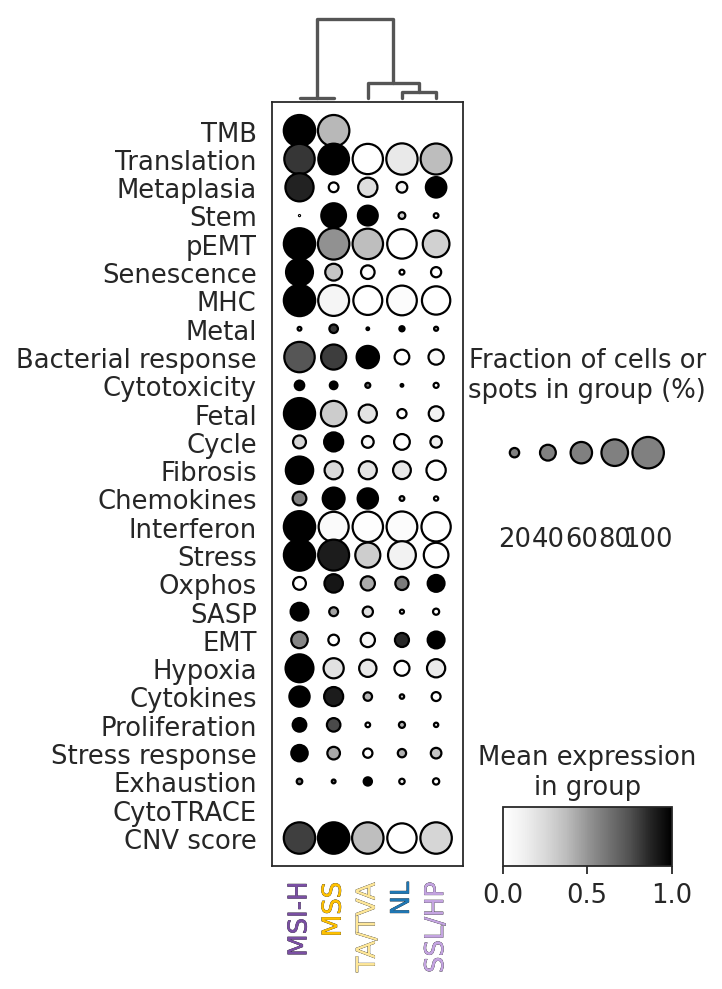

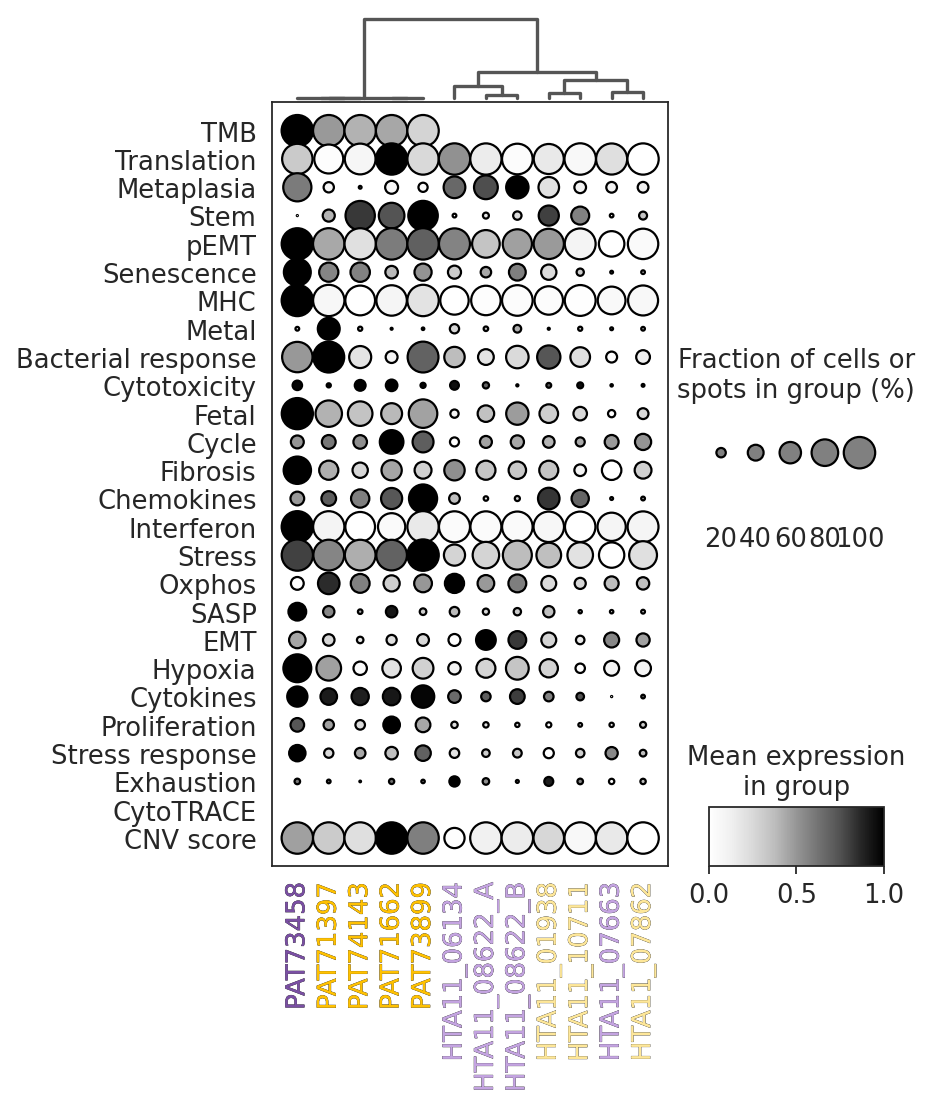

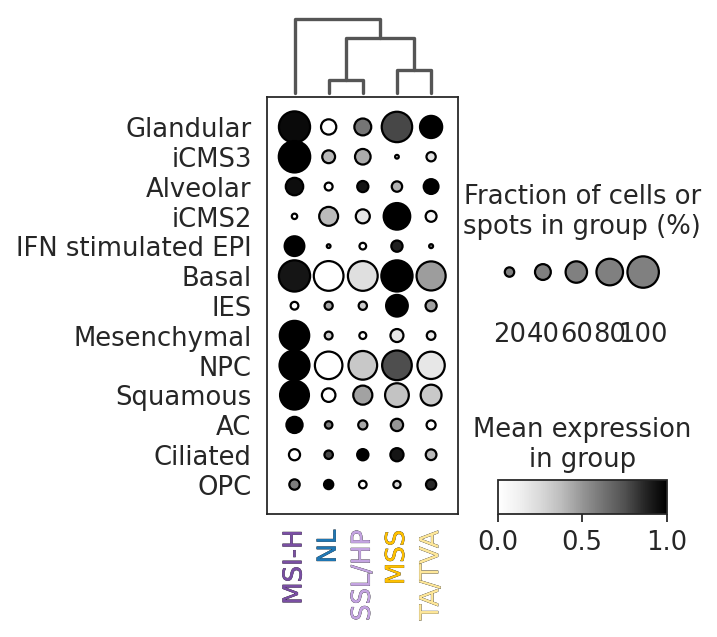

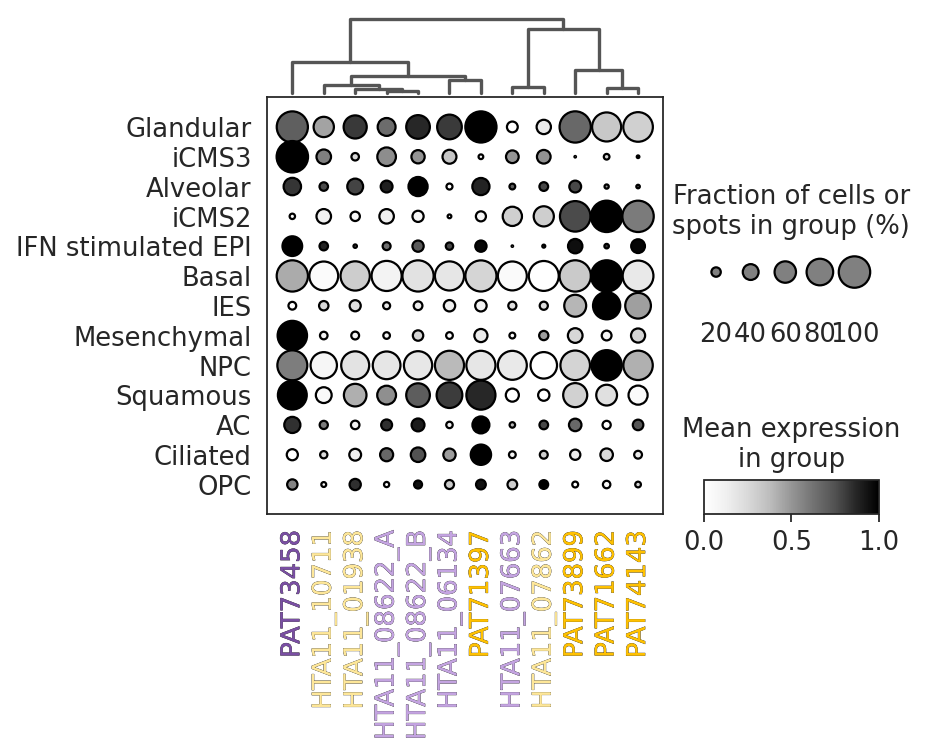

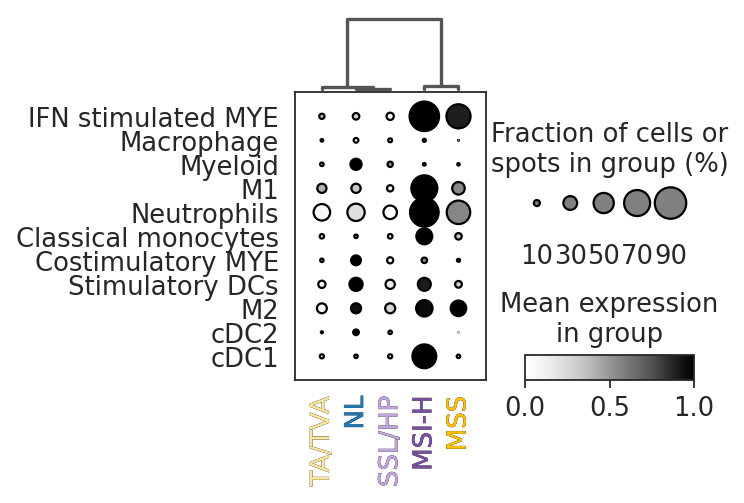

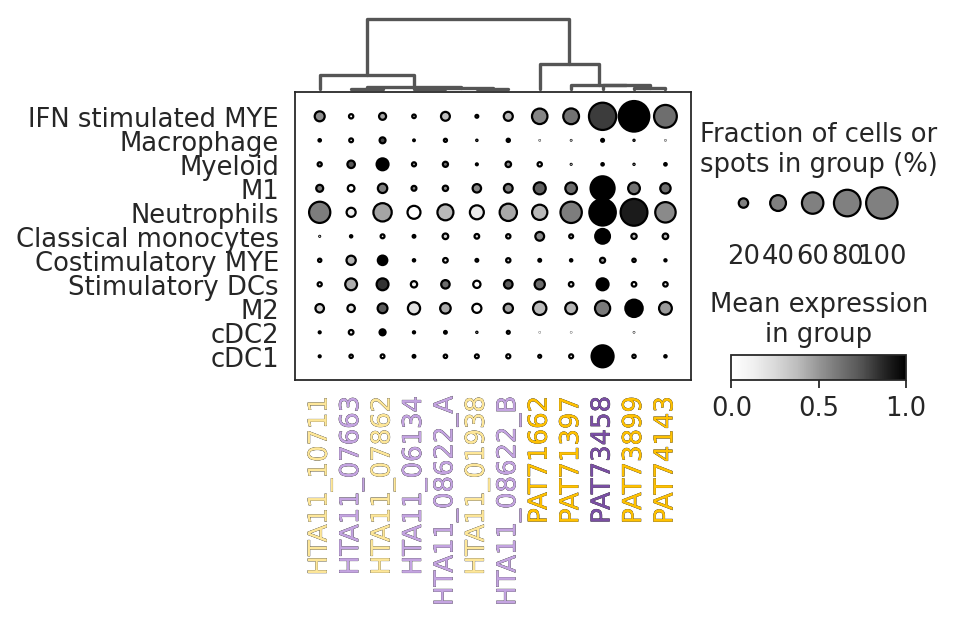

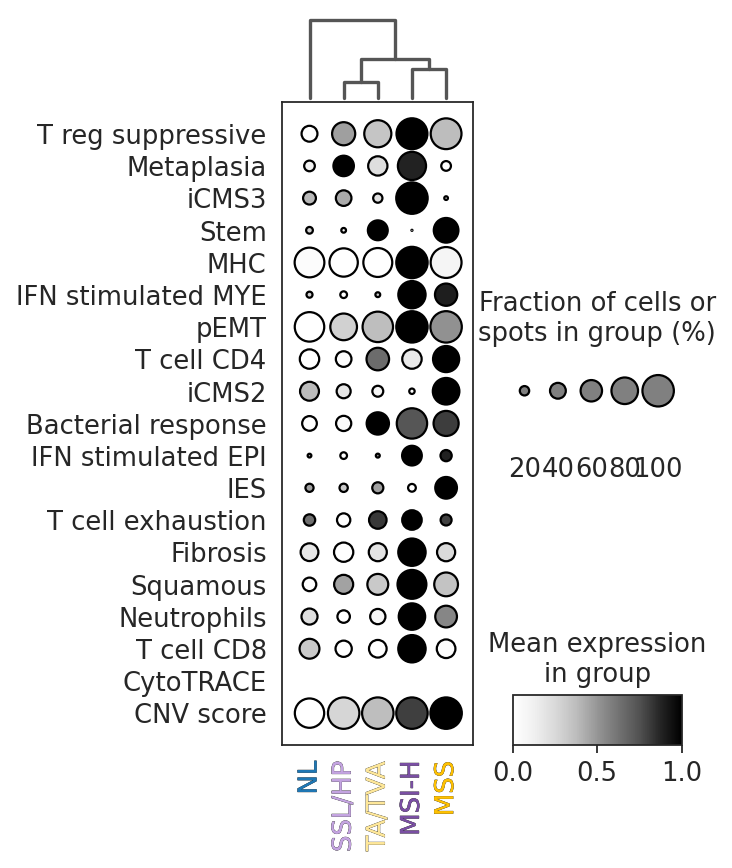

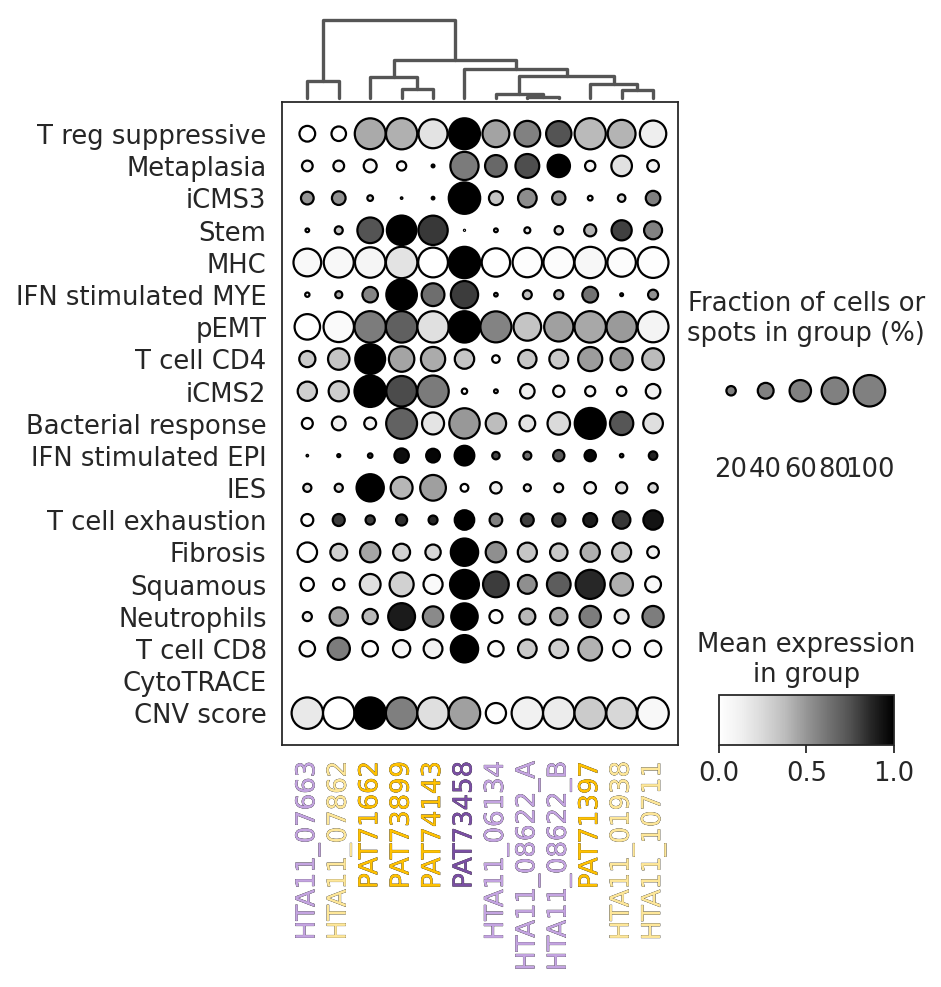

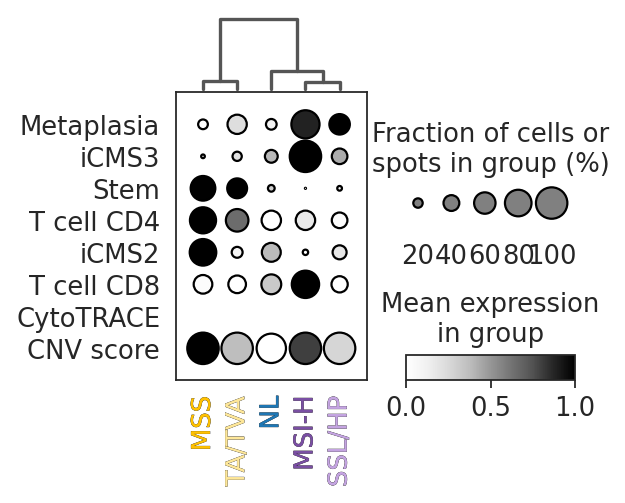

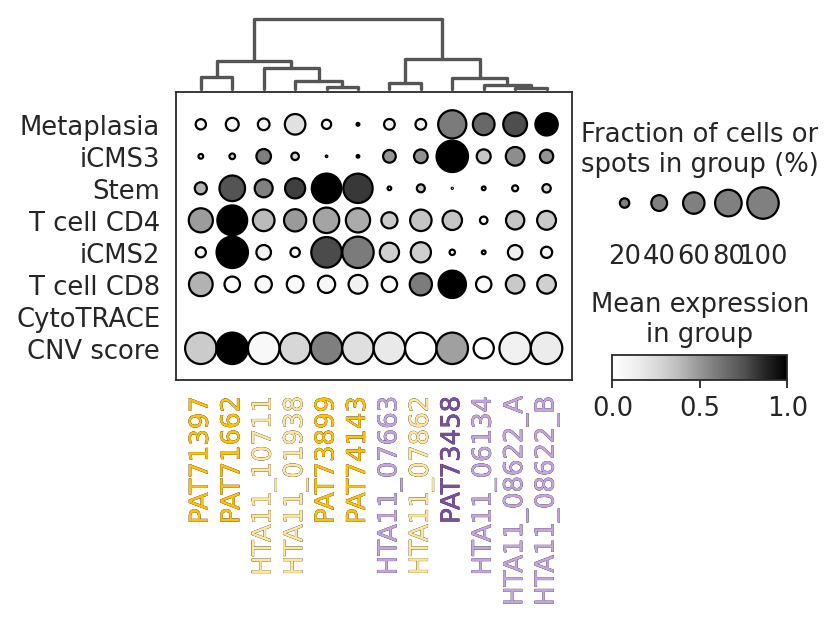

In [26]:
for features_name, features_list, height in zip(
        ["signatures_activity", "signatures_epi_stroma", "signatures_myeloid", "signatures_curated", "signatures_fig_1"],
        [signatures_activity, signatures_epi_stroma, signatures_myeloid, signatures_curated, signatures_fig_1],
        [signatures_activity_height, signatures_epi_stroma_height, signatures_myeloid_height, signatures_curated_height, signatures_fig_1_height],
    ):
    # set counter to 0 for the first group
    counter = 0
    for group_name, group, width, groupby_order, groupby_colordict, in zip(
        ["tumortype", "patient"],
        ["Tumor_Type", "Patient"],
        [tumor_type_width, patient_width],
        [None, None],
        [cmap_dict, patient_colordict],
    ):
        if counter == 0:
            # for the first group, hierarchically cluster the features
            features_ordered = cody_heatmap(
                a,
                groupby=group,
                features=features_list,
                cluster_vars=True,
                vars_dict=None,
                groupby_order=groupby_order,
                groupby_colordict=groupby_colordict,
                cluster_obs=True if groupby_order is None else False,
                figsize=(width, height),
                save="scRNA_out/plots_overview/{}_{}_dotplot.png".format(group_name, features_name),
                dpi=400,
                cmap="Greys",
                size_title="Fraction of cells or\nspots in group (%)",
            )
            counter += 1
        else:
            # after the first group, features are ordered based on the first group clustering
            cody_heatmap(
                a,
                groupby=group,
                features=features_ordered,
                cluster_vars=False,
                vars_dict=None,
                groupby_order=groupby_order,
                groupby_colordict=groupby_colordict,
                cluster_obs=True if groupby_order is None else False,
                figsize=(width, height),
                save="scRNA_out/plots_overview/{}_{}_dotplot.png".format(group_name, features_name),
                dpi=400,
                cmap="Greys",
                size_title="Fraction of cells or\nspots in group (%)",
            )

Using 8 features from adata.obs
Features ordered as given
Saving to scRNA_out/plots_overview/tumortype_signatures_fig_1_dotplot.png
Using 8 features from adata.obs
Features ordered as given
Saving to scRNA_out/plots_overview/patient_signatures_fig_1_dotplot.png


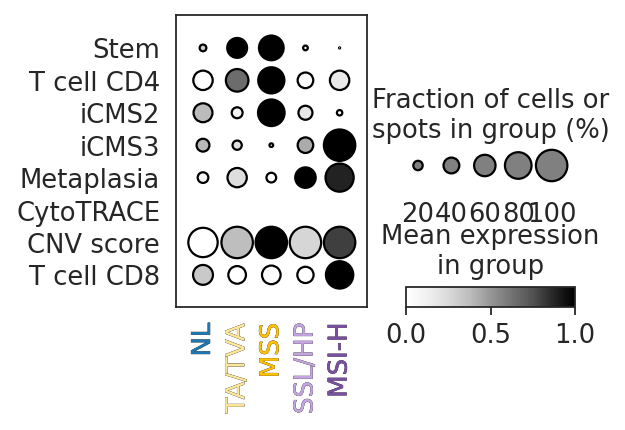

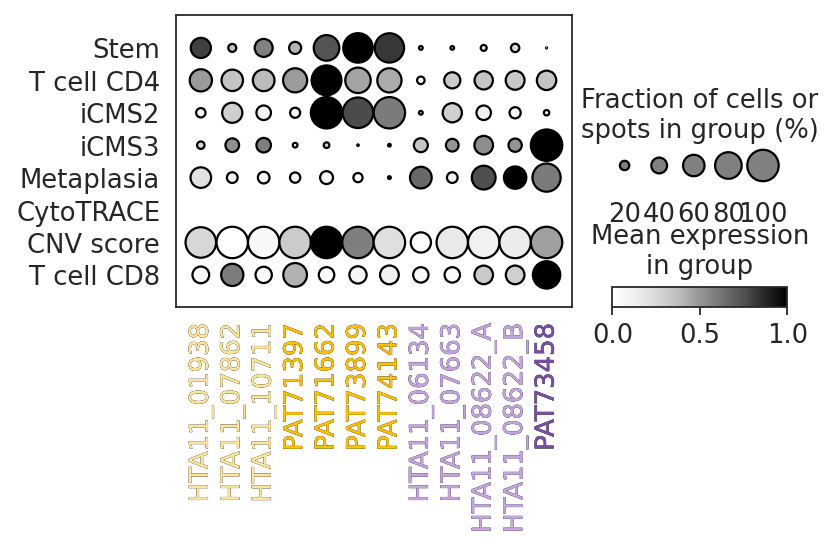

In [27]:
# re-run curated signatures with fixed ordering
for features_name, features_list, height in zip(
        ["signatures_fig_1"],
        [signatures_fig_1],
        [2.4],
    ):
    # set counter to 0 for the first group
    counter = 0
    for group_name, group, width, groupby_order, groupby_colordict, in zip(
        ["tumortype", "patient"],
        ["Tumor_Type", "Patient"],
        [tumor_type_width, patient_width],
        [["NL","TA/TVA","MSS","SSL/HP","MSI-H"], [
                "HTA11_01938",
                "HTA11_07862",
                "HTA11_10711",
                "PAT71397",
                "PAT71662",
                "PAT73899",
                "PAT74143",
                "HTA11_06134",
                "HTA11_07663",
                "HTA11_08622_A",
                "HTA11_08622_B",
                "PAT73458",
            ]],
        [cmap_dict, patient_colordict],
    ):
        if counter == 1:
            pass
        else:
            features_ordered = [
                "Stem",
                "T cell CD4",
                "iCMS2",
                "iCMS3",
                "Metaplasia",
                "CytoTRACE",
                "CNV score",
                "T cell CD8",
            ]
            # after the first group, features are ordered based on the first group clustering
            cody_heatmap(
                a,
                groupby=group,
                features=features_ordered,
                cluster_vars=False,
                vars_dict=None,
                groupby_order=groupby_order,
                groupby_colordict=groupby_colordict,
                cluster_obs=True if groupby_order is None else False,
                figsize=(width, height),
                save="scRNA_out/plots_overview/{}_{}_dotplot.png".format(group_name, features_name),
                dpi=400,
                cmap="Greys",
                size_title="Fraction of cells or\nspots in group (%)",
            )

Using 8 features from adata.obs
Features ordered as given
Saving to scRNA_out/plots_overview/patient_signatures_fig_1_dotplot.png


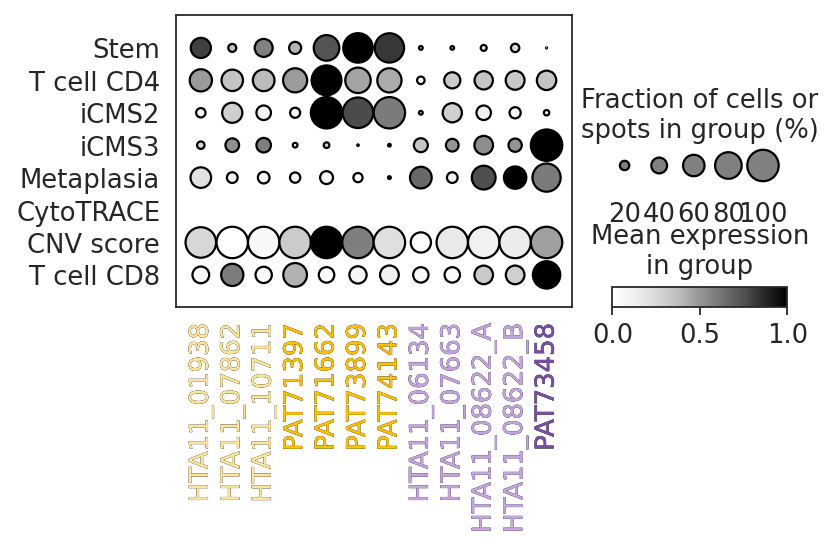

In [28]:
group_name = "patient"
features_name = "signatures_fig_1"
group = "Patient"
features_list = signatures_fig_1
height = signatures_fig_1_height
width = patient_width
groupby_colordict = patient_colordict
groupby_order = [
    "HTA11_01938",
    "HTA11_07862",
    "HTA11_10711",
    "PAT71397",
    "PAT71662",
    "PAT73899",
    "PAT74143",
    "HTA11_06134",
    "HTA11_07663",
    "HTA11_08622_A",
    "HTA11_08622_B",
    "PAT73458",
]
features_ordered = [
    "Stem",
    "T cell CD4",
    "iCMS2",
    "iCMS3",
    "Metaplasia",
    "CytoTRACE",
    "CNV score",
    "T cell CD8",
]

cody_heatmap(
    a,
    groupby=group,
    features=features_ordered,
    cluster_vars=False,
    vars_dict=None,
    groupby_order=groupby_order,
    groupby_colordict=groupby_colordict,
    cluster_obs=True if groupby_order is None else False,
    figsize=(width, 2.4),
    save="scRNA_out/plots_overview/{}_{}_dotplot.png".format(group_name, features_name),
    dpi=400,
    cmap="Greys",
    size_title="Fraction of cells or\nspots in group (%)",
)

---
# Gene and cell state summaries for immune exclusion analysis

In [29]:
custom_dict = {
    "PPT": ["CNV score","TMB"],
    "Excl.": ["IES","DDR1","TGFBI","PAK4","DPEP1","Fibrosis"],
    "uEnv.": ["CXCL14","CXCL12","SPP1"],
    "Inf.": ["T cell CD4","T reg suppressive","TRAC","T cell CD8","GZMB","GZMA","PLAUR","CD207"],
    "Act.": ["Oxphos","Hypoxia","pEMT"],
    "MSS": ["iCMS2","Stem","CEACAM6"],
    "MSI": ["iCMS3","MUC5AC","Metaplasia"],
    "NL": ["MUC2","SLC26A3","BEST4"],
}
custom_dict_height = 7.5

Using 31 features from adata.X and adata.obs
Using vars_dict for ordering features
categories: MSI-H, MSS, NL, etc.
var_group_labels: PPT, Excl., uEnv., etc.
Saving to scRNA_out/plots_overview/tumortype_immexcl_dotplot.png
Using 31 features from adata.X and adata.obs
Using vars_dict for ordering features
categories: HTA11_01938, HTA11_06134, HTA11_07663, etc.
var_group_labels: PPT, Excl., uEnv., etc.
Saving to scRNA_out/plots_overview/patient_immexcl_dotplot.png


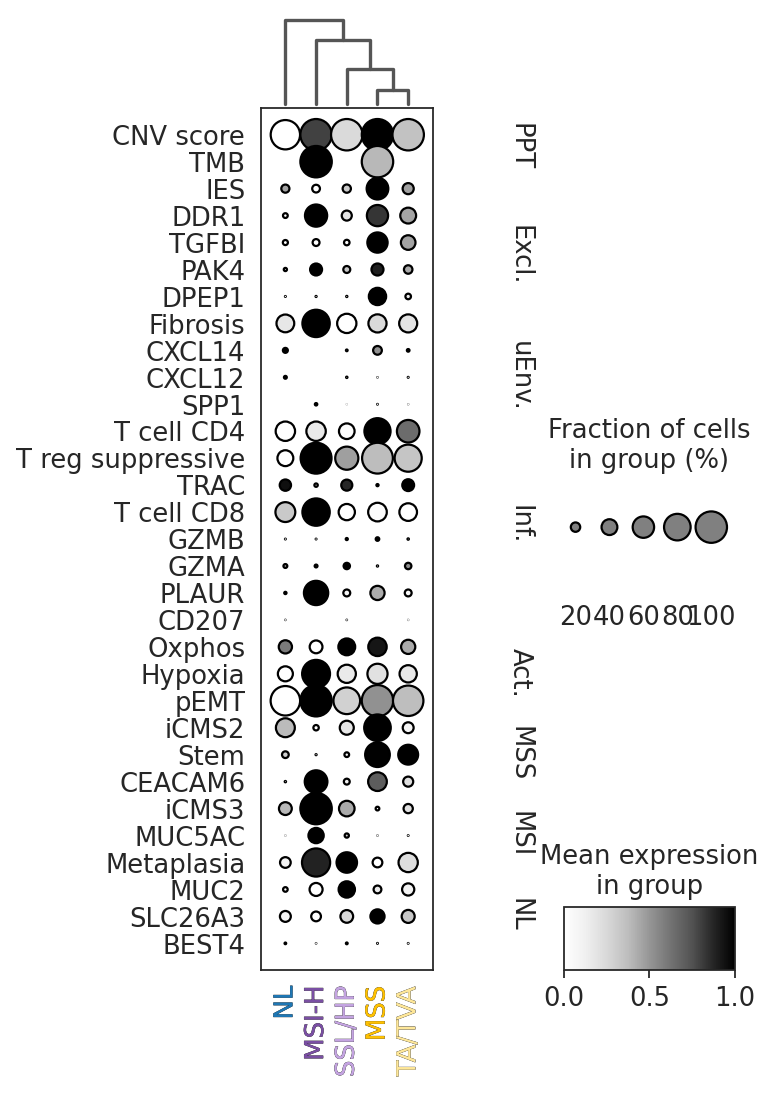

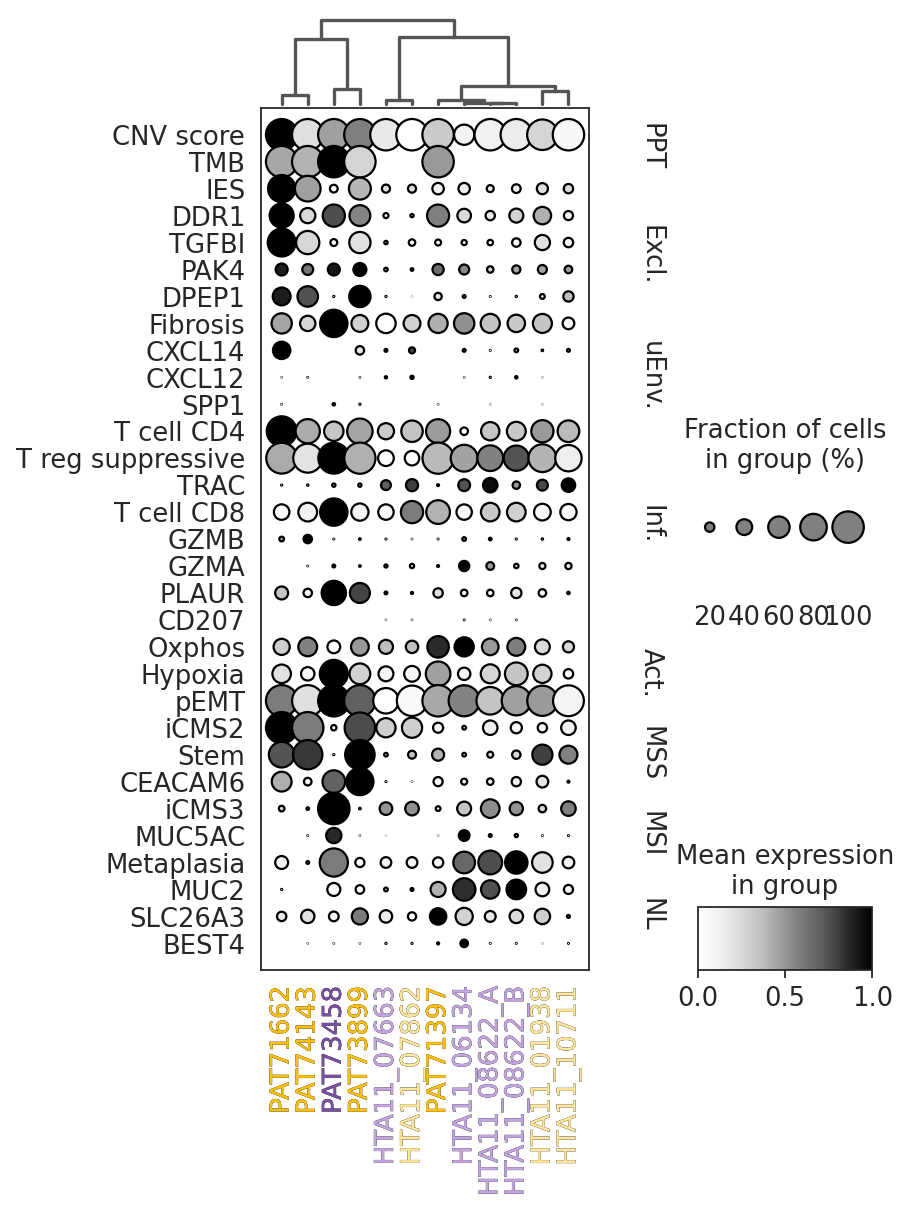

In [30]:
for features_name, features_list, height in zip(
        ["immexcl"],
        [custom_dict],
        [custom_dict_height],
    ):
    for group_name, group, width, groupby_order, groupby_colordict, in zip(
        ["tumortype", "patient"],
        ["Tumor_Type", "Patient"],
        [3.8, patient_width],
        [None, None],
        [cmap_dict, patient_colordict],
    ):
        cody_heatmap(
            a,
            groupby=group,
            features=sum(custom_dict.values(), []),
            cluster_vars=False,
            vars_dict=custom_dict,
            groupby_order=groupby_order,
            groupby_colordict=groupby_colordict,
            cluster_obs=True if groupby_order is None else False,
            figsize=(width, height),
            save="scRNA_out/plots_overview/{}_{}_dotplot.png".format(group_name, features_name),
            dpi=400,
            cmap="Greys",
            size_title="Fraction of cells\nin group (%)",
        )